Best Individual:  [[5, 7, 9, 10, 1, 6, 8, 3, 4, 2], [5, 6, 3, 7, 10, 8, 1, 2, 4, 9], [6, 9, 1, 8, 10, 5, 7, 3, 2, 4]]
Best Fitness (Shortest Distance):  9093888398.37204
[  0.          13.04735164  14.39872553  16.45421192  13.68958343
  18.30832406  14.5955712  105.7317543   12.42204279   9.49534069
  12.35469547]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[  0.          13.04735164  14.39872553  16.45421192  13.68958343
  18.30832406  14.5955712  105.7317543   12.42204279   9.49534069
  12.35469547]
[ 13.04735164   0.          26.55393567  29.27285455  24.02450817
  31.01802503  27.64178428 118.51905078  23.89945071  17.28118811
   5.04742296]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 

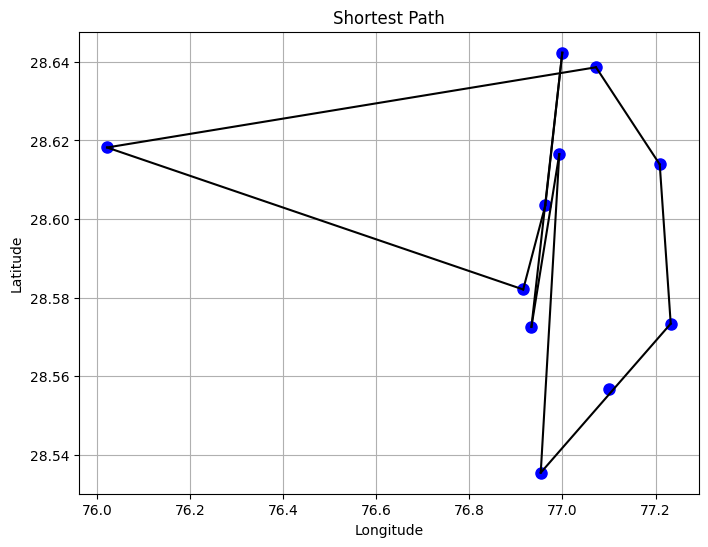

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# VRP problem parameters
numCustomers = 10
numVehicles = 3
station = 0

# Genetic Algorithm Parameters
popSize = 50
mutRate = 0.2
numGen = 100  # Changed number of generations for demonstration purposes

# Distance Matrix
distMatrix = np.array([
    [0.0,6.43821903,11.24452797,15.33673461,6.99183902,16.44631122,16.23697953,7.95225655,5.40006971,7.55690465,12.73922208,13.76434573],
    [6.43821903, 0.0, 7.70664365, 10.56035965, 7.23089208, 12.17500181, 10.25389801, 5.69689084, 3.65494322, 2.89892628, 10.68347308, 16.78507528],
    [11.24452797, 7.70664365, 0.0, 4.5036688, 5.58230835, 5.22541082, 7.59834231, 3.34747837, 5.91903256, 10.3876979, 3.54311669, 24.05797005],
    [15.33673461, 10.56035965, 4.5036688, 0.0, 10.08567039, 2.02660111, 4.55373945, 7.73022987, 9.93888128, 12.67123112, 6.2873473, 27.34442974],
    [6.99183902, 7.23089208, 5.58230835, 10.08567039, 0.0, 10.58322488, 12.67347183, 2.74557759, 3.59599575, 10.03255742, 5.90023901, 20.7071492],
    [16.44631122, 12.17500181, 5.22541082, 2.02660111, 10.58322488, 0.0, 6.34676631, 8.57145452, 11.07439724, 14.45352044, 5.75953664, 28.90436857],
    [16.23697953, 10.25389801, 7.59834231, 4.55373945, 12.67347183, 6.34676631, 0.0, 9.95833921, 11.20856139, 11.41460606, 10.41888099,26.47319994],
    [7.95225655, 5.69689084, 3034747837, 7.73022987, 2.74557759, 8.57145452, 9.95833921, 0.0, 2.82280801, 8.59345376, 5.2119963, 21.1099271],
    [5.40006971, 3.65494322, 5.91903256, 9093888128, 3.59599575, 11.07439724, 11.20856139, 2.82280801, 0.0, 6.43699713, 8.01047216, 18.29041743],
    [7.55690465, 2.89892628, 10.3876979, 12.67123112, 10.03255742, 14.45352044, 11.41460606, 8.59345376, 6.43699713, 0.0, 13.51454581, 15.06245043],
    [12.73922208, 10.68347308, 3.54311669, 6.2873473, 5.90023901, 5.75953634, 10.41888099, 5.2119963, 8.01047216, 13.51454581, 0.0, 26.23160357],
    [13.76434573, 16.78507528, 24.05797005, 27.34442974, 20.7071492, 28.90436857, 26.47319994, 21.1099271, 18.29041743, 15.06145043, 26.23160357, 0.0]
])

# Individual Representation
def createIndividual():
    customers = list(range(1, numCustomers + 1))
    random.shuffle(customers)
    paths = np.array_split(customers, numVehicles)
    return paths

# Fitness Function
def findFitness(individual):
    totalDist = 0
    for vehicle_route in individual:
        route = [station] + list(vehicle_route) + [station]
        for i in range(len(route) - 1):
            totalDist += distMatrix[route[i], route[i + 1]]  # Accessing distance from the matrix
    return -totalDist  # Minimize the total distance

# Tournament Selection for Crossover
def selection(population, k=5):
    selected = random.sample(population, k)
    return min(selected, key=findFitness)

# Ordered Crossover (OX)
def crossover(parent1, parent2):
    offspring = [[] for _ in range(numVehicles)]
    start, end = sorted(random.sample(range(numCustomers), 2))
    # Copy the selected segment from the 2nd parent to offspring
    for i in range(start, end + 1):
        for j in range(numVehicles):
            if i < len(parent2[j]):
                offspring[j].append(parent2[j][i])
    # Fill the remaining positions with genes from parent 1
    for i in range(numVehicles):
        for gene in parent1[i]:
            if gene not in offspring[i]:
                offspring[i].append(gene)
    return offspring

# Mutation Function
def mutation(individual):
    for vehicle_route in individual:
        if random.random() < mutRate:
            i, j = random.sample(range(len(vehicle_route)), 2)
            vehicle_route[i], vehicle_route[j] = vehicle_route[j], vehicle_route[i]
    return individual

# Initialization
pop = [createIndividual() for _ in range(popSize)]

# Evolution
for gen in range(numGen):
    newPop = []
    for _ in range(popSize):
        P1 = selection(pop)
        P2 = selection(pop)
        offspring = crossover(P1, P2)
        offspring = mutation(offspring)
        newPop.append(offspring)
    pop = newPop

# Finding Best Individual
bestIndividual = max(pop, key=findFitness)
bestFitness = -findFitness(bestIndividual)  # Getting the positive value

print("Best Individual: ", bestIndividual)
print("Best Fitness (Shortest Distance): ", bestFitness)


# Distance Matrix
from geopy.distance import geodesic

import numpy as np

# Sample Coordinates from South West Delhi

coordinates = [
    (28.5567, 77.1006), #IGI Airport
    (28.5734,77.2326), #Defence Colony
    (28.6035, 76.9633), #Najafgarh
    (28.5726, 76.9334), #Chhawala
    (28.6423, 76.9997), #Bijwasan
    (28.5821, 76.9157), #Kapashera
    (28.5355, 76.9534), #Mahipalpur
    (28.6182, 76.0220), #Matiala
    (28.6165, 76.9932), #Uttam Nagar
    (28.6386, 77.0721), #Rangpuri
    (28.6139, 77.2090), #Delhi
]

def calDistance(C1, C2):
    return geodesic(C1,C2).km


#Distance Matrix
numLocations = len(coordinates)
distMatrix = np.zeros((numLocations, numLocations))
for i in range(numLocations):
    for j in range(numLocations):
        distMatrix[i,j] = calDistance(coordinates[i], coordinates[j])
    for row in distMatrix:
        print(row)

# Extracting coordinates for the best individual path
best_route_coords = [(coordinates[i][0], coordinates[i][1]) for i in bestIndividual[0]]

# Plotting the coordinates and best route
plt.figure(figsize=(8, 6))
for coord in coordinates:
    plt.plot(coord[1], coord[0], 'o', markersize=8, color='blue')  # Latitude is x, Longitude is y

# Plotting the best route
for i in range(len(best_route_coords) - 1):
    plt.plot([best_route_coords[i][1], best_route_coords[i + 1][1]],
             [best_route_coords[i][0], best_route_coords[i + 1][0]], 'k-')

# Connecting last and first coordinates for a complete loop
plt.plot([best_route_coords[-1][1], best_route_coords[0][1]],
         [best_route_coords[-1][0], best_route_coords[0][0]], 'k-')

plt.title('Shortest Path')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()
